In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("FS_2y_before_Bankruptcy_train.csv")
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.024558,0.30051,0.10733,1.8368,34.382,-0.026711,-0.020067,2.2519,1.06670,0.67673,...,0.062497,-0.036289,0.9375,0.25454,13.632,3.693,69.389,5.2602,0.8826,0
1,0.639180,0.00000,1.00000,?,29.678,-1.139300,0.760520,?,1.11850,1.00000,...,0.67983,0.63918,0.32014,0.0,?,37.886,0,?,?,0
2,-0.440760,0.47723,0.19260,1.4678,34.555,0.000000,-0.440760,1.0954,1.51860,0.52277,...,-0.29059,-0.84313,1.2871,0.12538,?,2.5649,98.95,3.6887,3.8376,0
3,0.119520,0.17679,0.63546,4.5944,117.65,0.251540,0.148750,4.5826,1.12630,0.81017,...,0.11211,0.14752,0.88789,0.0,8.9302,10.287,40.355,9.0448,8.5169,0
4,0.230400,0.27095,0.23762,2.5745,-26.928,0.617540,0.282690,2.6907,0.80411,0.72905,...,0.45957,0.31602,0.6232,0.16465,7.9274,6.6605,68.502,5.3283,1.315,0


In [3]:
len(data)

6855

In [4]:
# "class"=1 <- 파산
bankrupt = np.sum(data['class']==1)
bankrupt

361

In [5]:
bankrupt/len(data)

0.052662290299051784

파산 비율 5.27%

In [47]:
x = data.iloc[:, :64]
y = data.iloc[:, 64]

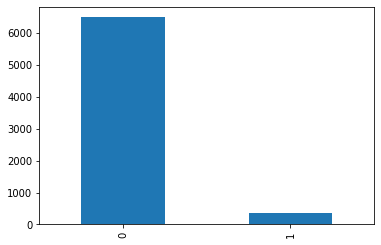

In [7]:
y.value_counts().plot(kind='bar') 
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 65 columns):
Attr1     6855 non-null float64
Attr2     6855 non-null float64
Attr3     6855 non-null float64
Attr4     6855 non-null object
Attr5     6855 non-null object
Attr6     6855 non-null float64
Attr7     6855 non-null float64
Attr8     6855 non-null object
Attr9     6855 non-null float64
Attr10    6855 non-null float64
Attr11    6855 non-null float64
Attr12    6855 non-null object
Attr13    6855 non-null object
Attr14    6855 non-null float64
Attr15    6855 non-null object
Attr16    6855 non-null object
Attr17    6855 non-null object
Attr18    6855 non-null float64
Attr19    6855 non-null object
Attr20    6855 non-null object
Attr21    6855 non-null object
Attr22    6855 non-null float64
Attr23    6855 non-null object
Attr24    6855 non-null object
Attr25    6855 non-null float64
Attr26    6855 non-null object
Attr27    6855 non-null object
Attr28    6855 non-null object
Attr29    685

결측치는 하나도 없다. 하지만 수치형 변수가 19개고 명목형 변수가 45개나 된다. data에 포함된 '?' 값들 때문

In [9]:
np.sum(data == '?').sort_values()

C:\Users\kmh50\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Attr1        0
Attr55       0
Attr51       0
Attr48       0
Attr38       0
          ... 
Attr64     162
Attr45     418
Attr60     420
Attr27     462
Attr37    3100
Length: 65, dtype: int64

37번째 feature는 거의 절반의 행(3100개)이 '?' 값으로 나온다. (Attr37 = (현재 자산 - 재고) / 장기 부채)

In [10]:
na_data = data[np.sum(data == "?", axis = 1)>=15]
na_data.shape

(19, 65)

In [11]:
np.sum(na_data['class'])/len(na_data)

0.05263157894736842

'?'가 한 개 있는 행들 중 파산 비율이 전체 데이터 파산비율 5.266%와 비슷하다. 삭제해도 될까

## Attr33: 경영 비용 / 단기 부채

In [12]:
x33 = data.iloc[:, 32]

In [13]:
x33.head()

0    4.9315
1         ?
2    4.7606
3    8.0308
4    3.4578
Name: Attr33, dtype: object

In [14]:
np.sum(x33=='?')

28

In [15]:
x33n = x33[x33 != '?'].astype("float64")
len(x33n)

6827

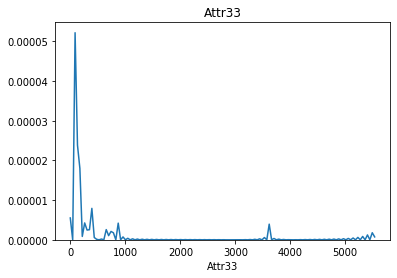

In [16]:
sns.distplot(x33n, hist = False)
plt.title('Attr33')
plt.show()

In [17]:
print(np.max(x33n)); print(np.min(x33n))

5534.1
0.0


In [18]:
print(x33n.quantile(q=0.999)); print(x33n.quantile(q=0.001))

370.72422000001643
0.0


In [19]:
x33n.sort_values()

4192       0.00
5764       0.00
3938       0.00
3182       0.00
1971       0.00
         ...   
4372     670.05
2099     756.50
5048     861.16
4679    3626.90
4994    5534.10
Name: Attr33, Length: 6827, dtype: float64

[(0, 500)]

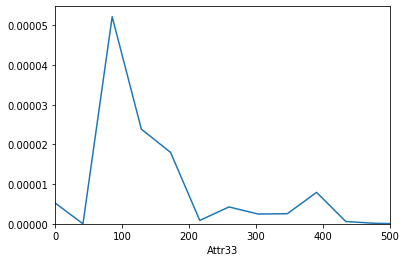

In [20]:
ax = sns.distplot(x33n, hist = False)
ax.set(xlim=(0, 500))

In [21]:
x = [0]
for i in range(data.shape[1] - 1):
    x.append(data.iloc[:, i])

In [22]:
for i in range(1,len(x)):
    if (np.sum(x[i]=="?"))!=0:
        x[i] = x[i][x[i] != "?"].astype("float64")

In [23]:
def find_best_i(feature_num, min, max) : 
    
    ratios = []
    for i in range(min,max):
        ratio_test = data["class"].iloc[list(x[feature_num][x[feature_num]<=i].index)]
        ratios.append(np.sum(ratio_test)/len(ratio_test))
    
    best_i = np.argmax(ratios)
    print("Best i : ", best_i+min)
    print("Best ratio : ", ratios[best_i])
    
    ax2 = sns.distplot(x[feature_num][x[feature_num]<=best_i][data["class"]==0], hist = False, label = "not bankrupted")
    ax2 = sns.distplot(x[feature_num][x[feature_num]<=best_i][data["class"]==1], hist = False, label = "bankrupted")
    ax2.legend()
    
    best_i_test = data["class"].iloc[list(x[feature_num][x[feature_num]<=best_i+min].index)]
    print("Bankrupted : ", np.sum(best_i_test==1))
    print("Not Bankrupted : ", np.sum(best_i_test==0))
    print("# of elements : ", len(best_i_test))

In [24]:
def find_best_i_abs(feature_num, min, max) : 

    ratios = []
    for i in range(min,max):
        ratio_test = data["class"].iloc[list(x[feature_num][np.abs(x[feature_num])<=i].index)]
        ratios.append(np.sum(ratio_test)/len(ratio_test))
    
    best_i = np.argmax(ratios)
    print("Best i : ", best_i+min)
    print("Best ratio : ", ratios[best_i])
    
    ax2 = sns.distplot(x[feature_num][np.abs(x[feature_num])<=best_i][data["class"]==0], hist = False, label = "not bankrupted")
    ax2 = sns.distplot(x[feature_num][np.abs(x[feature_num])<=best_i][data["class"]==1], hist = False, label = "bankrupted")
    ax2.legend()
    
    best_i_test = data["class"].iloc[list(x[feature_num][np.abs(x[feature_num])<=best_i+min].index)]
    print("Bankrupted : ", np.sum(best_i_test==1))
    print("Not Bankrupted : ", np.sum(best_i_test==0))
    print("# of elements : ", len(best_i_test))

Best i :  1
Best ratio :  0.09831460674157304
Bankrupted :  35
Not Bankrupted :  321
# of elements :  356


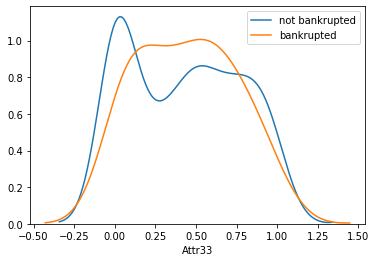

In [25]:
find_best_i_abs(33,0,500)

## Attr34: 경영 비용 / 총 부채

In [26]:
np.sum(x[34]=='?')

0

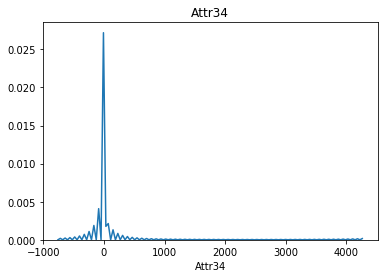

In [27]:
sns.distplot(x[34], hist = False)
plt.title('Attr34')
plt.show()

In [28]:
print(np.max(x[34])); print(np.min(x[34]))

4260.2
-756.5


In [29]:
print(x[34].quantile(q=0.999)); print(x[34].quantile(q=0.001))

192.33760000002093
-7.568951199999999


In [30]:
x[34].sort_values()

2099    -756.500
6369     -89.042
5149     -38.524
141      -22.244
3802     -19.764
          ...   
4142     367.500
2654     386.030
2918     409.900
4679    3626.900
4994    4260.200
Name: Attr34, Length: 6840, dtype: float64

4994가 Attr33과 Attr34에서 모두 높게 나옴

In [31]:
def intt(feature_num):
    print("Number of ? : ", np.sum(x[feature_num]=="?"))
    print("Length of the variable : ", len(x[feature_num]))
    
    fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
    sns.distplot(x[feature_num], ax=ax[0])
    
    sns.distplot(x[feature_num][data["class"]==0], hist = False, label = "not bankrupted", ax=ax[1])
    sns.distplot(x[feature_num][data["class"]==1], hist = False, label = "bankrupted", ax=ax[1])

Number of ? :  0
Length of the variable :  6840


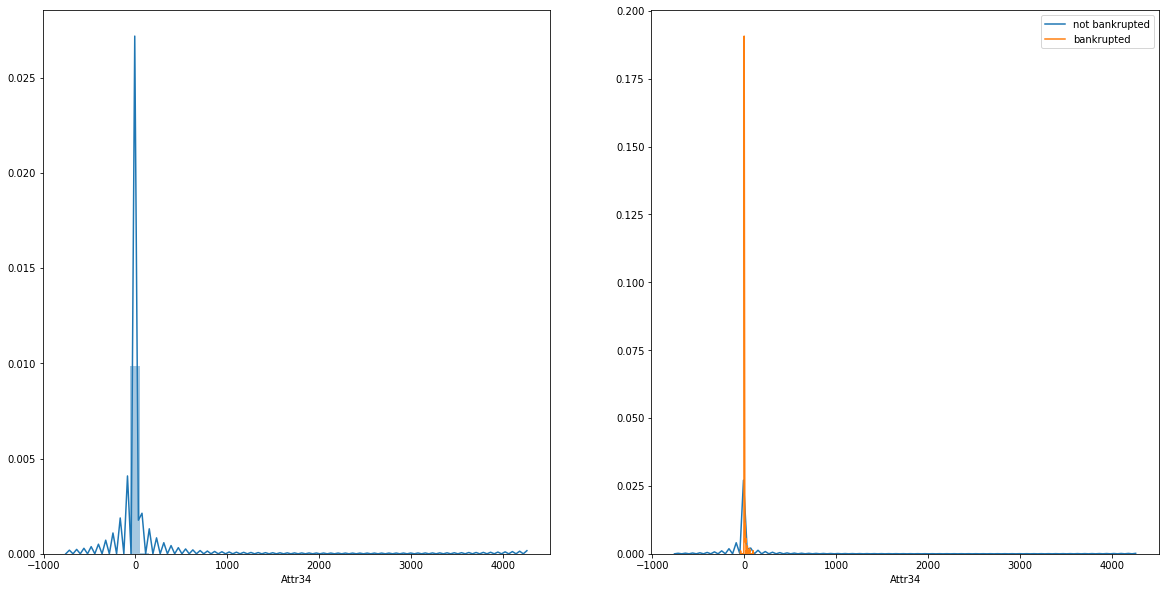

In [32]:
intt(34)

Best i :  3
Best ratio :  0.057634208691610504
Bankrupted :  248
Not Bankrupted :  4055
# of elements :  4303


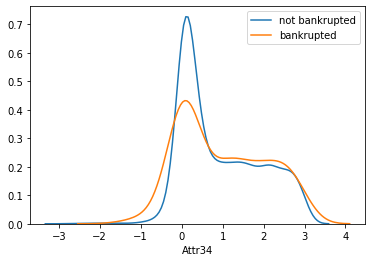

In [33]:
find_best_i_abs(34,0,50)

## Attr35: 매출 이익 / 총 자산

In [34]:
np.sum(x[35]=='?')

0

In [35]:
print(x[35].quantile(q=0.999)); print(x[35].quantile(q=0.001))

1.5815494000000536
-2.0943504


In [36]:
x[35].sort_values()

6665    -4.7922
3802    -4.3107
3823    -4.0435
423     -3.7357
2333    -3.6423
         ...   
3891     1.9114
2150     2.6648
3982     2.9506
5381    13.8600
4994    38.6180
Name: Attr35, Length: 6855, dtype: float64

4994가 또 가장 높게 나왔다. 33, 34, 35 변수를 묶을 수 있을 것 같다. 

Number of ? :  0
Length of the variable :  6855


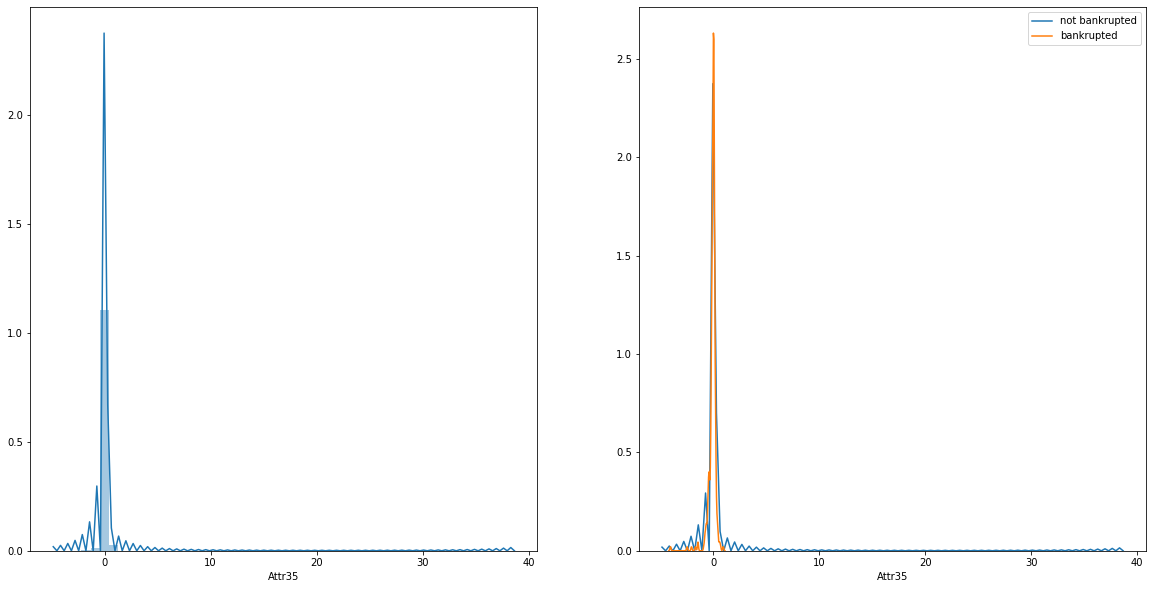

In [37]:
intt(35)

Best i :  0
Best ratio :  0.1167929292929293
Bankrupted :  185
Not Bankrupted :  1399
# of elements :  1584


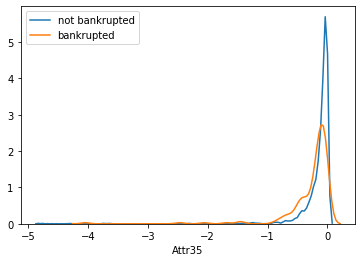

In [38]:
find_best_i(35,0,2)

In [39]:
for i in range(1,64):
    maxfirm_i = np.argmax(x[i])
    print(maxfirm_i)

503
5313
5381
2099
3774
6281
4994
2099
4994
2586
4994
4679
6817
4994
3250
4679
2099
6817
5304
1542
5718
4994
5304
6281
2586
4679
1957
1363
3445
5935
5304
4119
4994
4994
4994
4994
1792
2586
1593
2099
4768
1458
2555
2555
4119
2099
2334
4994
1593
2099
5935
4119
2897
1363
4383
1593
2673
5810
3866
4994
4314
5935
4994


C:\Users\kmh50\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


각 변수에서 max값을 갖는 회사들; 특정 회사가 여러번 등장하는 걸 보니 설명변수 간 상관관계가 있을 것으로 보임

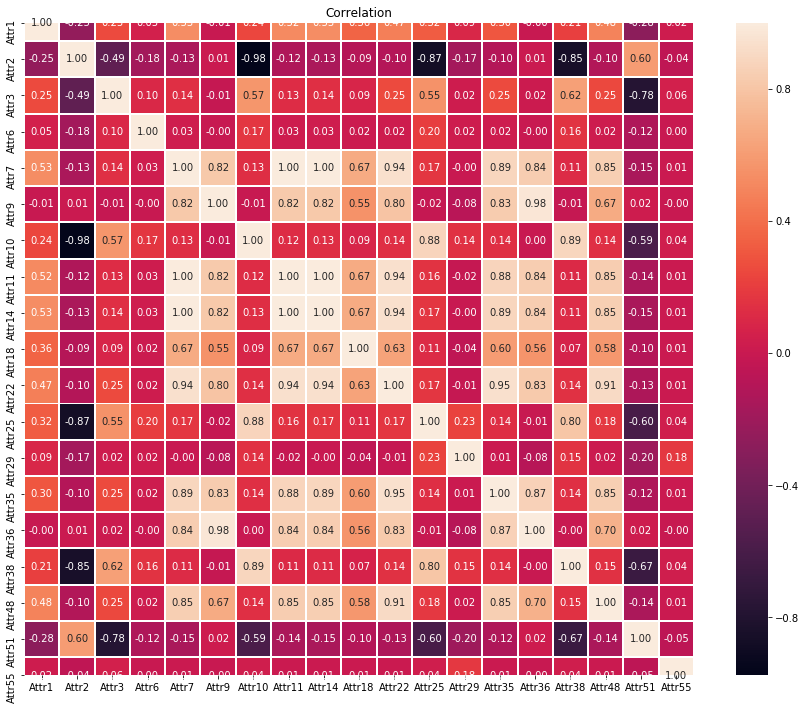

In [83]:
plt.figure(figsize=(15,12))
sns.heatmap(x.corr(), annot=True, fmt='.2f', linewidths=1)
plt.title("Correlation")
plt.savefig('heatmap.png')

* 7, 9, 11, 14, 22, 35, 36, 48: 서로 높은 상관관계
* 2, 10: -1에 가까운 상관관계

In [50]:
data.corr()

,Attr1,Attr2,Attr3,Attr6,Attr7,Attr9,Attr10,Attr11,Attr14,Attr18,Attr22,Attr25,Attr29,Attr35,Attr36,Attr38,Attr48,Attr51,Attr55,class
Attr1,1.000000,-0.246649,0.252035,0.051956,0.529876,-0.006516,0.240718,0.520754,0.529871,0.355457,0.471863,0.322915,0.091054,0.301467,-0.004687,0.207913,0.483313,-0.275186,0.021702,-0.083002
Attr2,-0.246649,1.000000,-0.488920,-0.178506,-0.134301,0.008865,-0.975117,-0.123961,-0.134298,-0.089631,-0.101813,-0.868050,-0.168658,-0.097356,0.010254,-0.851407,-0.103919,0.601226,-0.041713,0.104618
Attr3,0.252035,-0.488920,1.000000,0.102005,0.137079,-0.012712,0.568832,0.128138,0.137068,0.089539,0.251900,0.554443,0.021672,0.252510,0.015674,0.619885,0.250147,-0.775884,0.056146,-0.091132
Attr6,0.051956,-0.178506,0.102005,1.000000,0.028409,-0.003176,0.173431,0.025586,0.028409,0.019074,0.023188,0.201324,0.022509,0.020563,-0.002690,0.158084,0.023801,-0.123811,0.003710,-0.016769
Attr7,0.529876,-0.134301,0.137079,0.028409,1.000000,0.822183,0.131437,0.995801,0.999996,0.671779,0.944979,0.169745,-0.001467,0.887134,0.839166,0.112916,0.849690,-0.149099,0.011570,-0.046444
Attr9,-0.006516,0.008865,-0.012712,-0.003176,0.822183,1.000000,-0.008258,0.824618,0.822181,0.552744,0.795517,-0.016547,-0.077971,0.831829,0.976145,-0.012673,0.670887,0.020169,-0.002974,0.001649
Attr10,0.240718,-0.975117,0.568832,0.173431,0.131437,-0.008258,1.000000,0.121794,0.131433,0.087395,0.140335,0.878508,0.144223,0.137651,0.001361,0.885239,0.141508,-0.587371,0.037698,-0.103006
Attr11,0.520754,-0.123961,0.128138,0.025586,0.995801,0.824618,0.121794,1.000000,0.995796,0.668711,0.943623,0.158737,-0.017055,0.883968,0.841547,0.105116,0.845155,-0.137189,0.009262,-0.037429
Attr14,0.529871,-0.134298,0.137068,0.028409,0.999996,0.822181,0.131433,0.995796,1.000000,0.673952,0.944973,0.169744,-0.001630,0.887153,0.839163,0.112895,0.849715,-0.149095,0.011567,-0.046453
Attr18,0.355457,-0.089631,0.089539,0.019074,0.671779,0.552744,0.087395,0.668711,0.673952,1.000000,0.634439,0.113941,-0.042192,0.601771,0.563953,0.070747,0.577976,-0.099440,0.006929,-0.033356


In [71]:
x2 = x[x != '?'].astype("float64")

In [74]:
corr = x2.corr()

In [75]:
corr.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
Attr1,1.000000,-0.246649,0.252035,-0.000078,0.004036,0.051956,0.529876,0.001590,-0.006516,0.240718,...,0.021702,0.006856,0.066397,-0.041197,-0.006527,-0.001140,-0.000428,-0.020698,0.023676,0.030842
Attr2,-0.246649,1.000000,-0.488920,-0.013728,-0.013446,-0.178506,-0.134301,-0.019709,0.008865,-0.975117,...,-0.041713,-0.023360,-0.001977,0.024713,0.010057,-0.008783,-0.007647,0.224728,-0.030804,0.016676
Attr3,0.252035,-0.488920,1.000000,0.028069,0.022053,0.102005,0.137079,0.019108,-0.012712,0.568832,...,0.056146,0.028678,0.001802,-0.031007,-0.005410,0.003716,0.009949,-0.306141,0.044788,0.028544
Attr4,-0.000078,-0.013728,0.028069,1.000000,0.014181,0.000088,-0.000364,0.815085,-0.000496,0.014095,...,-0.000961,-0.001429,-0.000080,0.026606,-0.000793,0.002772,0.010523,-0.001583,0.016592,-0.001084
Attr5,0.004036,-0.013446,0.022053,0.014181,1.000000,0.002527,0.002178,0.010460,0.032212,0.015568,...,0.004111,0.001423,0.000168,-0.002897,0.000457,0.000213,0.007385,-0.018775,0.008544,0.001546


In [90]:
data2 = data[data != '?'].astype('float64')

In [91]:
corr2 = data2.corr()

In [92]:
corr2.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
Attr1,1.000000,-0.246649,0.252035,-0.000078,0.004036,0.051956,0.529876,0.001590,-0.006516,0.240718,...,0.006856,0.066397,-0.041197,-0.006527,-0.001140,-0.000428,-0.020698,0.023676,0.030842,-0.083002
Attr2,-0.246649,1.000000,-0.488920,-0.013728,-0.013446,-0.178506,-0.134301,-0.019709,0.008865,-0.975117,...,-0.023360,-0.001977,0.024713,0.010057,-0.008783,-0.007647,0.224728,-0.030804,0.016676,0.104618
Attr3,0.252035,-0.488920,1.000000,0.028069,0.022053,0.102005,0.137079,0.019108,-0.012712,0.568832,...,0.028678,0.001802,-0.031007,-0.005410,0.003716,0.009949,-0.306141,0.044788,0.028544,-0.091132
Attr4,-0.000078,-0.013728,0.028069,1.000000,0.014181,0.000088,-0.000364,0.815085,-0.000496,0.014095,...,-0.001429,-0.000080,0.026606,-0.000793,0.002772,0.010523,-0.001583,0.016592,-0.001084,-0.004057
Attr5,0.004036,-0.013446,0.022053,0.014181,1.000000,0.002527,0.002178,0.010460,0.032212,0.015568,...,0.001423,0.000168,-0.002897,0.000457,0.000213,0.007385,-0.018775,0.008544,0.001546,-0.004164


#### X1, X7, X11, X14, X22, X35

Text(0.5, 1, 'Correlation')

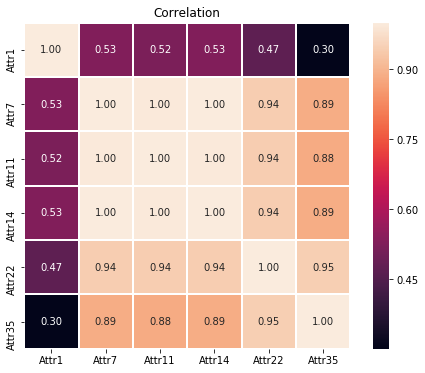

In [114]:
plt.figure(figsize=(8,6))
sns.heatmap(corr.iloc[[0,6,10,13,21,34],[0,6,10,13,21,34]], annot=True, square=True, fmt='.2f', linewidths=1).set_ylim(6,0)
plt.title("Correlation")

#### X2, X3, X10, X25, X38, X51

Text(0.5, 1, 'Correlation')

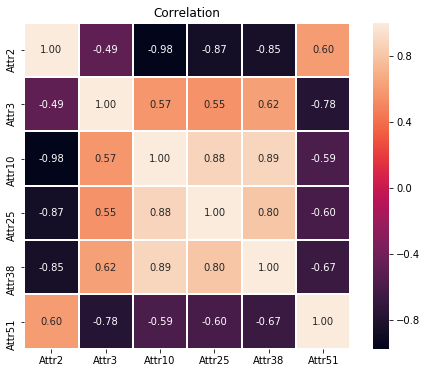

In [115]:
plt.figure(figsize=(8,6))
sns.heatmap(corr.iloc[[1,2,9,24,37,50],[1,2,9,24,37,50]], annot=True, square=True, fmt='.2f', linewidths=1).set_ylim(6,0)
plt.title("Correlation")

#### X4, X40, X46, X50

Text(0.5, 1, 'Correlation')

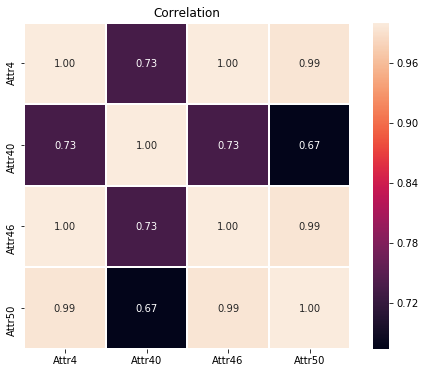

In [116]:
plt.figure(figsize=(8,6))
sns.heatmap(corr.iloc[[3,39,45,49],[3,39,45,49]], annot=True, square=True, fmt='.2f', linewidths=1).set_ylim(4,0)
plt.title("Correlation")

#### X6, X24

Text(0.5, 1, 'Correlation')

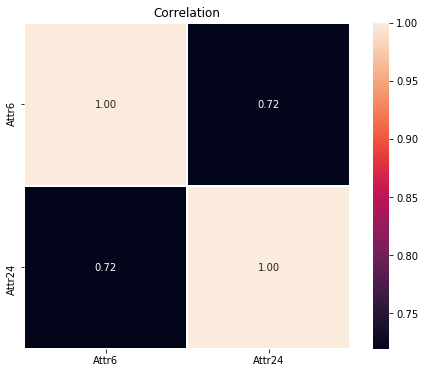

In [117]:
plt.figure(figsize=(8,6))
sns.heatmap(corr.iloc[[5,23],[5,23]], annot=True, square=True, fmt='.2f', linewidths=1).set_ylim(2,0)
plt.title("Correlation")

#### X8, X17, X50

Text(0.5, 1, 'Correlation')

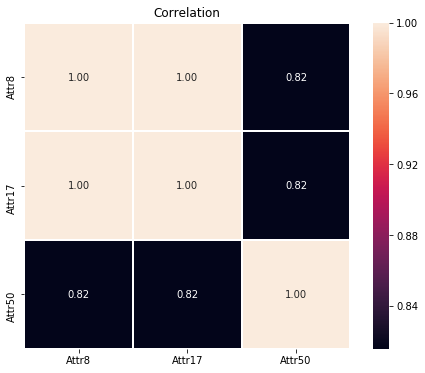

In [118]:
plt.figure(figsize=(8,6))
sns.heatmap(corr.iloc[[7,16,49],[7,16,49]], annot=True, square=True, fmt='.2f', linewidths=1).set_ylim(3,0)
plt.title("Correlation")

#### X9, X36

Text(0.5, 1, 'Correlation')

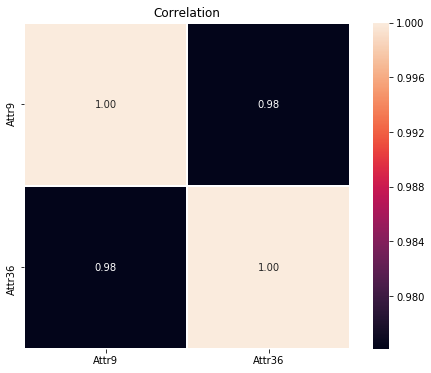

In [119]:
plt.figure(figsize=(8,6))
sns.heatmap(corr.iloc[[8,35],[8,35]], annot=True, square=True, fmt='.2f', linewidths=1).set_ylim(2,0)
plt.title("Correlation")